# Music Genre Classification

# Problem Statement:
- The Dataset contains information about Music Tracks (like: Artist, popularity, duration etc) and the goal is to classify this Tracks into 11 classes that correspond to Music Genres (rock, pop etc).
- Type of problem: Multiclass Classification

# Dataset:
- The Music Genre classification Dataset is available on Kaggle and is composed by 17996 rows and 17 columns where the Target Variable is :'Class’
-Link: https://www.kaggle.com/datasets/purumalgi/music-genre-classification

In [ ]:
# some dependencies
#!pip install missingno
#!pip install imblearn
#!pip install mlxtend
#!pip install sklearn_pandas
#!pip install catboost
#!pip install category_encoders
#!pip install pandas_profiling
#!pip install xgboost
#!pip install lightgbm

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# utils (preprocessing, metrics)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from scipy.stats import loguniform, beta, uniform
import itertools
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, cross_val_score, RandomizedSearchCV, cross_validate
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Classifier:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier


#dimensionality reduction and sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load Dataset

In [ ]:
# load csv file
df = pd.read_csv('train.csv')

#  Exploratory data analysis

- Check if the shape of the dataset is as expected

In [ ]:
df.shape

(17996, 17)

- Inspect the data

In [ ]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [ ]:
df.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


- Check for missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
# percentage missing values
df.isnull().sum(axis=0)/df.shape[0]

Artist Name           0.000000
Track Name            0.000000
Popularity            0.023783
danceability          0.000000
energy                0.000000
key                   0.111914
loudness              0.000000
mode                  0.000000
speechiness           0.000000
acousticness          0.000000
instrumentalness      0.243221
liveness              0.000000
valence               0.000000
tempo                 0.000000
duration_in min/ms    0.000000
time_signature        0.000000
Class                 0.000000
dtype: float64

In [ ]:
# more information on dataset
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


- Understand Features and distinguish Numerical from Categorical

   (code from github mdipietro09/DataScience_ArtificialIntelligence_Utils)

In [ ]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") or (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}

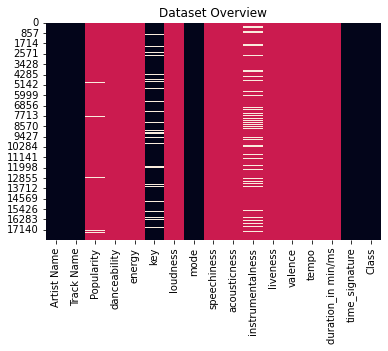

 Categerocial   Numeric   NaN 


In [ ]:
#heatmap to visualize categorical and numerical features
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

- Understad better values of features using ProfileReport

**Consideration on Features:**


- Artist Name: Categorical | High Cardinality
- Track Name: Categorical |High Cardinality
- Popularity: Missing Values | Normal Distribution
- Danceabilty: Normal Distributions
- energy: values 0 - 1
- key: Missing values
- mode: Categorical | values 0/1
- speechiness: values 0 - 1
- acousticness: values 0 - 1
- instrumentalness: Missing Values  |values 0 - 1
- liveness:values 0 - 1
- valence: values 0 - 1 | Normal Distribution
- tempo: Normal Distribution
- duration_in min/ms: High difference between min and max values
- time signature: Categorical | 4 values
- class: Imbalance Classes. I will try different sampling techniques to deal with imbalances

# Data Visualization


- Visualize missing  values

<AxesSubplot:>

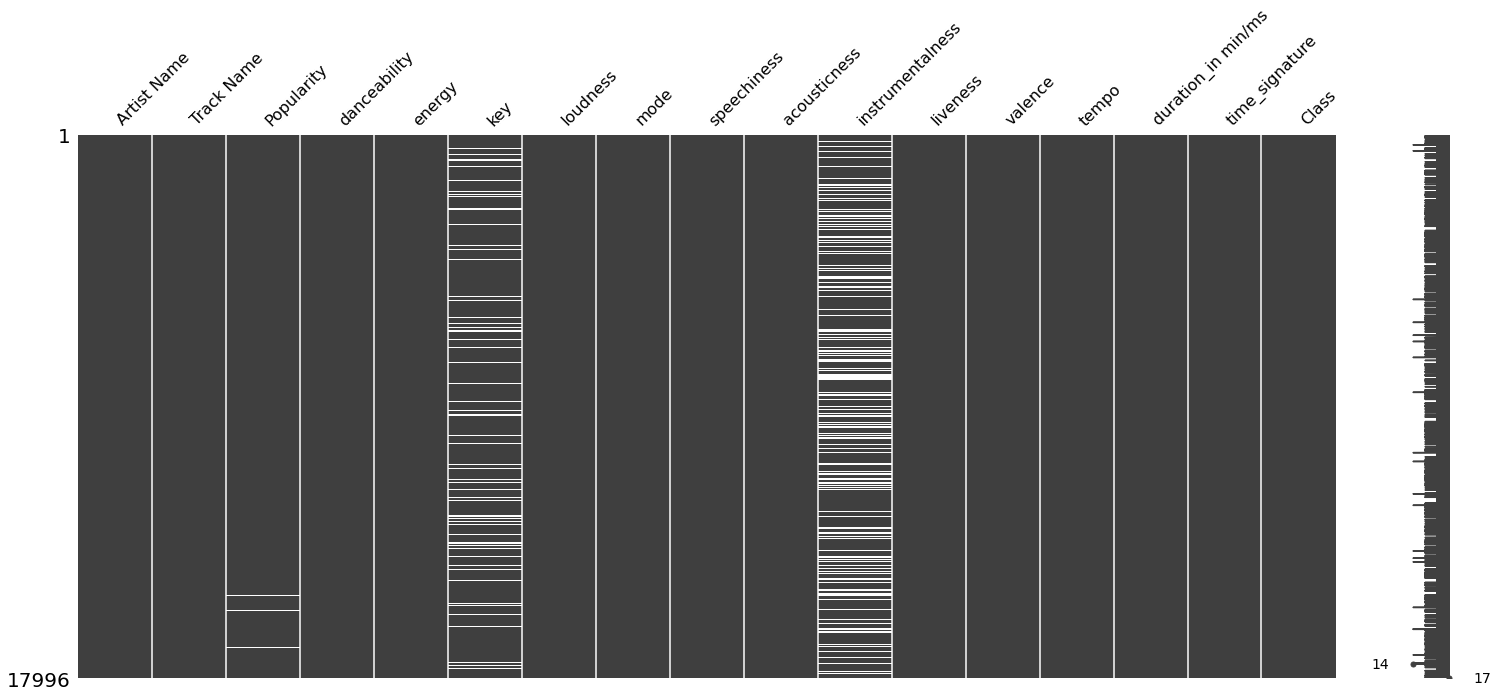

In [ ]:
msno.matrix(df)

- Divide numerical and categorical and visualize with histogram

In [ ]:
# divide categorical and numerical features
df_cat = df[['Artist Name', 'Track Name', 'time_signature', 'key', 'mode', 'Class']]
df_num = df[['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms']]

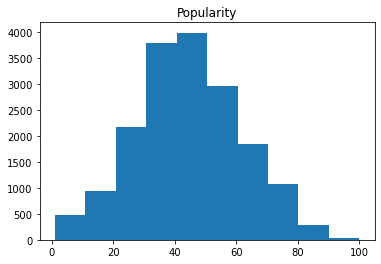

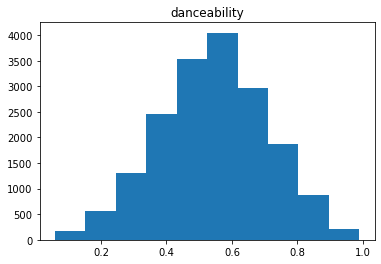

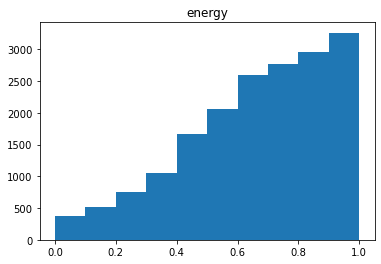

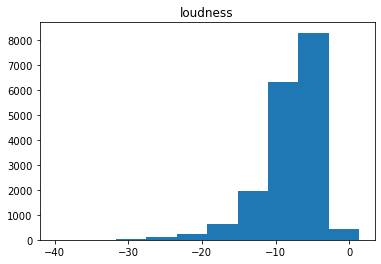

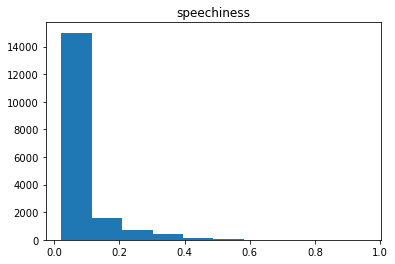

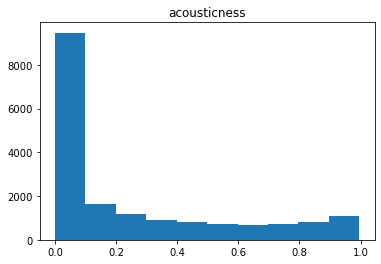

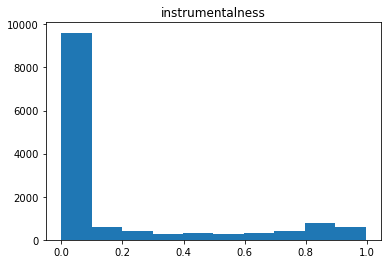

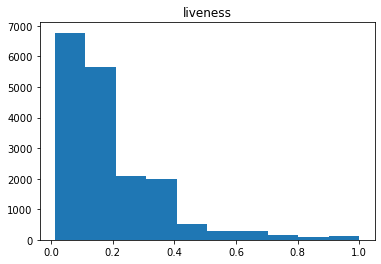

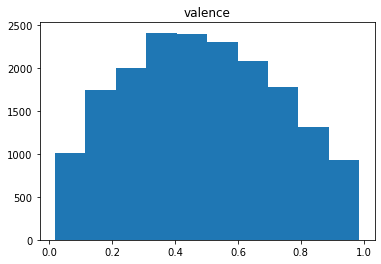

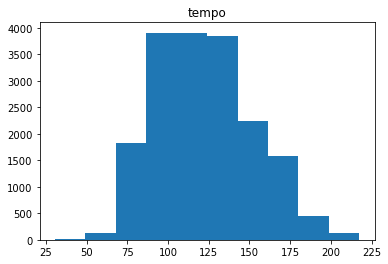

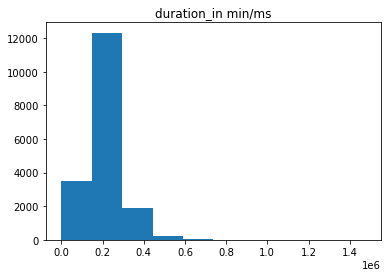

In [ ]:
# visualize using histogram numerical columns
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

- Visualize correlention (even thogh difficolut with multiclass dataset to obtain usefull insight)

<AxesSubplot:>

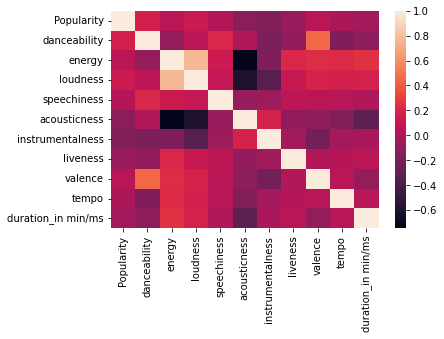

In [ ]:
# heatmap to visualize correlations
sns.heatmap(df_num.corr())

In [ ]:
# pivot table (hard to gain insight)
pd.pivot_table(df, index = 'Class', values = ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms'])

,Popularity,acousticness,danceability,duration_in min/ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Class,,,,,,,,,,,
0,38.105263,0.579951,0.525798,4.121132,0.435147,0.099464,0.145641,-10.240144,0.043510,120.204082,0.382684
1,45.883185,0.188958,0.536833,225403.860160,0.688304,0.199239,0.188059,-7.781162,0.067848,124.873452,0.505400
2,32.911695,0.388652,0.561220,247517.368711,0.577879,0.097938,0.207682,-9.055176,0.061240,122.748731,0.612596
3,26.242268,0.727855,0.498281,4.971157,0.521456,0.131430,0.236150,-10.213672,0.078229,113.519682,0.627075
4,57.294278,0.313100,0.595506,3.391492,0.600072,0.012675,0.166787,-8.486959,0.041906,123.003475,0.612765
5,48.638596,0.202211,0.725989,207435.806496,0.642619,0.068779,0.195609,-7.469736,0.232698,117.940362,0.545974
6,41.474843,0.228830,0.552541,229285.001546,0.653723,0.262643,0.182585,-8.249528,0.067378,123.230027,0.487472
7,41.506399,0.906322,0.425584,4.117292,0.155145,0.740386,0.128216,-18.796507,0.045550,106.331550,0.229589
8,42.226674,0.026877,0.411870,270761.782632,0.875775,0.235927,0.227966,-5.892958,0.088745,128.338720,0.320031


In [ ]:
# select categorical features that can be visualized by an histogram
df_cat_hist = df_cat.drop(['Artist Name', 'Track Name'], axis=1)
df_cat_hist

,time_signature,key,mode,Class
0,4,1.0,1,5
1,4,3.0,1,10
2,4,6.0,1,6
3,4,10.0,0,5
4,4,2.0,1,10
...,...,...,...,...
17991,3,7.0,0,6
17992,4,11.0,0,2
17993,4,4.0,0,8
17994,4,6.0,0,8


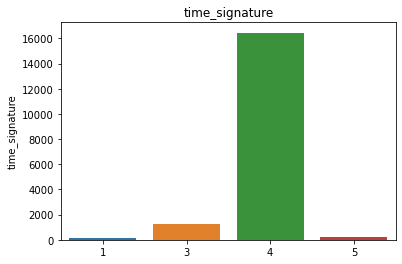

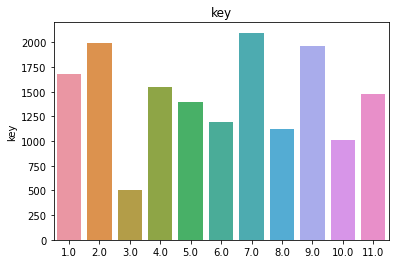

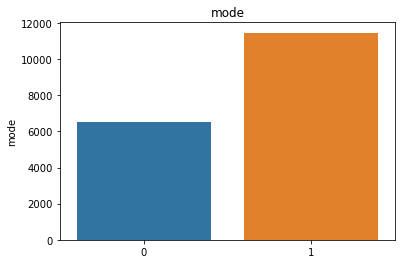

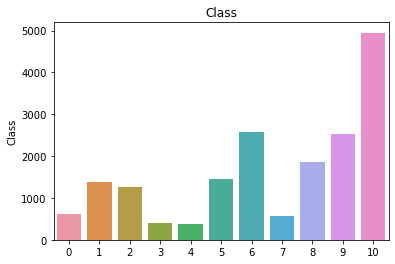

In [ ]:
# visualize histogram for categorical columns
for i in df_cat_hist.columns:
    sns.barplot(df_cat_hist[i].value_counts().index,df_cat_hist[i].value_counts()).set_title(i)
    plt.show()

                time_signature       key      mode     Class
time_signature        1.000000  0.006965 -0.019989  0.047989
key                   0.006965  1.000000 -0.112452 -0.007829
mode                 -0.019989 -0.112452  1.000000 -0.044740
Class                 0.047989 -0.007829 -0.044740  1.000000


<AxesSubplot:>

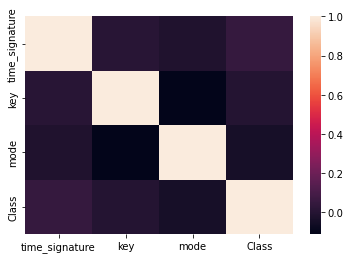

In [ ]:
# heatmap for categorical features correlations
print(df_cat.corr())
sns.heatmap(df_cat.corr())

# Preprocessing and  Feature engineering

- Use insight given from EDA and Visualization to create pipeline for preprocess the data before using the classifier

**Consideration for preprocessing:**

- Artist Name and Track Name have high cardinality and values are not numbers:  I can use 4 main different strategy to deal with those values:    
1) Count frequency strategy (substitute values with theyr frequence in the features)  
2) Target Encoder  
3) Do not preprocess and use classifier that deal with string categorical feature like Catboost  
4) Drop Them  
I will try the first 3 since it intuitive that this features are important for the classification
- Instrumental: has many missing value but i won't drop it (same reason as Artist Name) so i will impute with SimpleImputer (most_frequent)  
- duration_in min/msm: some value are in minute other in ms. I will create a custom transformer to put those value in the same scale.  
- time signature: Is categorical i will apply OneHotEncoder  
- Popularity: impute with mean  
- key: not many missing so impute value and Scale  
- other feature do not need to deal with missing values or encoders, I will normalize/scale considering theyr distributions (MinMaxScaler and StandardScaler)



- Build Custom Transformer for Duration_min/ms, Artist Name and Track Name

In [ ]:
# Use count/Frequence Strategy for Artist Name
class ArtistFreqTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        artist_freq = X['Artist Name'].value_counts().to_dict()
        X['Artist Name'] = X['Artist Name'].map(artist_freq)
        return X

    def get_feature_names_out(self, input_features=None):
        return ['artist_freq']

In [ ]:
# Use count/Frequence Strategy for Track Name
class TrackFreqTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        track_freq = X['Track Name'].value_counts().to_dict()
        X['Track Name'] = X['Track Name'].map(track_freq)
        return X

    def get_feature_names_out(self, input_features=None):
        return ['Track_freq']

In [ ]:
# Put all values of duration_min/ms in same scale (minute)
def ms_to_min(X):
    minute = []
    for i in X['duration_in min/ms']:
        if i < 100:
            minute.append(i)
        else:
            minute.append(i/60000)


    X['duration_in min/ms'] = minute
    return X
title_ts = FunctionTransformer(ms_to_min)

class MinuteTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        return ms_to_min(X)

    def get_feature_names_out(self, input_features=None):
        return ['ms_to_min']

- Create pipeline for preprocessing data

In [ ]:
# pipeline for popularity and instrumentalness
pipeline_popularity_instrumentalness = Pipeline([
    ('imp', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())

])


# pipeline for key
pipeline_key_2 = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('minmax', MinMaxScaler())

])

# pipeline for duration_in_min/ms
pipeline_duration = Pipeline([
    ('custom', MinuteTransformer()),
    ('scaler', StandardScaler())

])


- Create column Transformer for the 3 different strategy as explained in preprocessing consideration

In [ ]:
# preprocess both Artist Name and Track Name using count/freq strategy
final_transformation_1 = ColumnTransformer(transformers=[
    ('Artist_Name', ArtistFreqTransformer(), ['Artist Name']),
    ('Track_Name', TrackFreqTransformer(), ['Track Name']),
    ('popularity_instrumentalness', pipeline_popularity_instrumentalness, ['Popularity', 'instrumentalness']),
    ('key', pipeline_key_2, ['key'] ),
    ('time_sig', OneHotEncoder(), ['time_signature']),
    ('minute', pipeline_duration, ['duration_in min/ms']),
    ('scaler', StandardScaler(), ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']),


],

remainder='passthrough',
verbose_feature_names_out=False,
sparse_threshold = 0
)

# Use Target Encoder to Track Name and Artist Name
final_transformation_2 = ColumnTransformer(transformers=[
    ('Artist_Name', TargetEncoder(), ['Artist Name']),
    ('Track_Name', TargetEncoder(), ['Track Name']),
    ('popularity_instrumentalness', pipeline_popularity_instrumentalness, ['Popularity', 'instrumentalness']),
    ('key', pipeline_key_2, ['key'] ),
    ('time_sig', OneHotEncoder(), ['time_signature']),
    ('minute', pipeline_duration, ['duration_in min/ms']),
    ('scaler', StandardScaler(), ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']),

],

remainder='passthrough',
verbose_feature_names_out=False,
sparse_threshold = 0
)

# pass Track Name and Artist Name without preprogessing
final_transformation_3 = ColumnTransformer(transformers=[
    ('popularity_instrumentalness', pipeline_popularity_instrumentalness, ['Popularity', 'instrumentalness']),
    ('key', pipeline_key_2, ['key'] ),
    ('time_sig', OneHotEncoder(), ['time_signature']),
    ('minute', pipeline_duration, ['duration_in min/ms']),
    ('scaler', StandardScaler(), ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']),
],

remainder='passthrough',
verbose_feature_names_out=False,
sparse_threshold = 0
)


# Model Selection

- Split data into training and test sets

In [ ]:
# split data:
X = df.drop(['Class'], axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14396, 16), (14396,), (3600, 16), (3600,))

# Find best model and transformation:

- Build pipline with Transformation, sampler (to deal with imbalance classes), dimentionality reduction and classifier)

In [ ]:
# general pipeline
model_pipeline = IMBPipeline([
    ('trans', final_transformation_1),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.9)),
    ('classifier', DecisionTreeClassifier())
])

- Define function that given a pipeline/classifier print evaluation metrics like accuracy, precision, recall, f1_weighted

In [ ]:
def metrics_given_pipeline(pip):
    # fit pipeline
    pip.fit(X_train, y_train)
    # predict
    y_pred = pip.predict(X_test)

    # Evaluate the model using accuracy, precision, recall, and f1_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)

- Try different configurantions in particular for the classifiers and trasnformations to understand what type of classifier and type of preprocessing (strategy 1 or 2) is better for this dataset. More hyperparameter tuning for sampler, dimensionality reduction will be done to optimize the best classfier
(part of code from Lab:ExampleProject prof Zignani)

In [ ]:
transformation_configs = [
    {
        'trans':[final_transformation_1, final_transformation_2]
    }
]
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
    },

]
dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.6, 0.85, 0.95]
    },
]

# classifier need to have as objective multiclass classification type
classifier_configs = [

    {
        'classifier': [LogisticRegression(multi_class='multinomial', solver='lbfgs')],
        'classifier__penalty': ['l1','l2'],
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,9]
    },
    {
        'classifier' : [RandomForestClassifier(class_weight='balanced')],
        'classifier__n_estimators' : [10,100, 500]
    },
    {
        'classifier' : [LGBMClassifier(objective= 'multiclass')],
        'classifier__n_estimators' : [10,100, 500]
    },
    {
        'classifier' : [XGBClassifier(objective='multi:softmax')],

    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__criterion' :["gini", "entropy"]
    },
    {
        'classifier': [SVC()],
        'classifier__kernel': ['rbf', 'poly'],

    }

]


In [ ]:
all_configs = [dict(itertools.chain(*(e.items() for e in configuration))) for configuration in itertools.product(transformation_configs, sampler_configs,dim_reduction_configs,classifier_configs)]

In [ ]:
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 28'

- Use RandomSearch to find best model and evaluate with cross validation

In [ ]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1_weighted'
)

In [ ]:
scores = cross_validate(rs, X_train, y_train, scoring='f1_weighted', cv = 4, return_estimator=True, verbose=3, error_score='raise')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.447 total time= 6.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.1min remaining:    0.0s


[CV] END ......................................., score=0.462 total time= 6.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 12.2min remaining:    0.0s


[CV] END ......................................., score=0.456 total time= 6.5min
[CV] END ......................................., score=0.458 total time= 6.4min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 25.1min finished


Score (f1_weighted):  
score=0.447  
score=0.462  
score=0.456  
score=0.458   

- view what is the best classifier / transformation type

In [ ]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['trans'])
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('Artist_Name', ArtistFreqTransformer(),
                                 ['Artist Name']),
                                ('Track_Name', TrackFreqTransformer(),
                                 ['Track Name']),
                                ('popularity_instrumentalness',
                                 Pipeline(steps=[('imp', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Popularity', 'instrumentalness']),
                                ('key',
                                 Pipeline(steps=[('imp', KN...
                                                 ('minmax', MinMaxScaler())]),
                                 ['key']),
                                ('time_sig', OneHotEncoder(),
                                 ['time_signature']),
                                ('minute',
                  

- The best model using a preprocessing step on Artist Name and Track Name  is:     LGBMClassifier (100 estimator) with Final_transformation_1.
So from now on for Classifier that are not Catboost we will use strategy 1 (Count/Frequence Strategy)

# CatBoost Classifier with no preprocessing on Artist and Track

- Now try strategy 3) where we won't preprocess Artist and Track name using CatboostClassifier

In [ ]:
# use CatBoostClassifier Using as categorical columns Artist Name, Track Name and mode

# To use this strategy we need to have a dataframe after the transformation and to have name for the columns
cat_cols = ['Artist Name', 'Track Name', 'mode'] # name of categorical columns
col_num = [x for x in range(0, 16)]  # will be name of other columns
col_name =  col_num+cat_cols
model_pipeline_cat = IMBPipeline([
    ('trans', final_transformation_3),
    # transform from numpy array to dataframe:
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=col_name))),
    ('classifier', CatBoostClassifier(eval_metric= 'MultiClass', cat_features=cat_cols))
])
metrics_given_pipeline(model_pipeline_cat)


Learning rate set to 0.090655
0:	learn: 2.2604989	total: 81.3ms	remaining: 1m 21s
1:	learn: 2.1592762	total: 159ms	remaining: 1m 19s
2:	learn: 2.0818781	total: 239ms	remaining: 1m 19s
3:	learn: 2.0181809	total: 320ms	remaining: 1m 19s
4:	learn: 1.9676217	total: 400ms	remaining: 1m 19s
5:	learn: 1.9205192	total: 505ms	remaining: 1m 23s
6:	learn: 1.8760843	total: 585ms	remaining: 1m 23s
7:	learn: 1.8220080	total: 661ms	remaining: 1m 21s
8:	learn: 1.7709044	total: 725ms	remaining: 1m 19s
9:	learn: 1.7409161	total: 801ms	remaining: 1m 19s
10:	learn: 1.6993987	total: 864ms	remaining: 1m 17s
11:	learn: 1.6685930	total: 939ms	remaining: 1m 17s
12:	learn: 1.6420685	total: 1.03s	remaining: 1m 17s
13:	learn: 1.6171548	total: 1.09s	remaining: 1m 17s
14:	learn: 1.5878762	total: 1.17s	remaining: 1m 16s
15:	learn: 1.5704704	total: 1.25s	remaining: 1m 17s
16:	learn: 1.5539267	total: 1.33s	remaining: 1m 17s
17:	learn: 1.5393329	total: 1.42s	remaining: 1m 17s
18:	learn: 1.5238545	total: 1.51s	remaining

Evaluation metrics:  
Accuracy: 0.6380555555555556  
Precision: 0.634919792519906  
Recall: 0.6380555555555556  
F1 score: 0.6243703684214107  

In [ ]:
# Evaluate using cross validation
scores = cross_validate(model_pipeline_cat, X_train, y_train, scoring='f1_weighted', cv = 4, return_estimator=True, verbose=3, error_score='raise')

# Optimize Classifiers for both strategy

## Optimize LGBMClassifier

In [ ]:
# Pipeline for LGBMClassifier
model_pipeline_lgbm = IMBPipeline([
    ('trans', final_transformation_1),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.9)),
    ('classifier', LGBMClassifier(objective= 'multiclass'))
])

- Try different dimensionality reduction, sampling thechnique and hyperparameter
(considering previous information about the previous best model LGBMClassifier)

In [ ]:
sampler_configs_lgbm = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 'not majority', 'not minority'],
        'sampler__k_neighbors': [3, 5, 7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 'not majority', 'not minority']
    }

]
dim_reduction_configs_lgbm = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [LDA()],
        'dim_reduction__n_components': [0.6, 0.85, 0.95],

    },
    {
        'dim_reduction': [KernelPCA()],
        'dim_reduction__kernel': ['poly', 'rbf'],
        'dim_reduction__n_components': [0.6, 0.85, 0.95],
        'dim_reduction__degree': [2, 3]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1_weighted')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10, 14]
    }
]

classifier_configs_lgbm = [

    {
        'classifier' : [LGBMClassifier(objective= 'multiclass')],
        'classifier__n_estimators' : [80, 100, 150, 200, 300],
        'classifier__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 0.9],
        'classifier__num_leaves': [20, 30, 50],
        'classifier__max_depth': [5, 20, 40, 100, -1],

    },
]

In [ ]:
all_configs_lgbm = [dict(itertools.chain(*(e.items() for e in configuration))) for configuration in itertools.product(sampler_configs_lgbm,dim_reduction_configs_lgbm, classifier_configs_lgbm)]

In [ ]:
f'Number of all possible configurations: {len(all_configs_lgbm)}'

'Number of all possible configurations: 12'

In [ ]:
rs_lgbm = RandomizedSearchCV(model_pipeline_lgbm,
    param_distributions=all_configs_lgbm,
    n_iter=len(all_configs_lgbm) * 10,
    n_jobs=-1,
    cv = 2,
    scoring='f1_weighted'
)

In [ ]:
scores = cross_validate(rs_lgbm, X_train, y_train, scoring='f1_weighted', cv = 4, return_estimator=True, verbose=3, error_score='raise')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.447 total time= 4.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV] END ......................................., score=0.468 total time= 3.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.4min remaining:    0.0s


[CV] END ......................................., score=0.437 total time= 3.1min
[CV] END ......................................., score=0.455 total time= 2.9min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 13.5min finished


Score F1_weighted:  
score=0.447  
score=0.468  
score=0.437  
score=0.455  

In [ ]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

SMOTE(n_jobs=-1, sampling_strategy='not minority')
None
LGBMClassifier(learning_rate=0.05, max_depth=20, num_leaves=20,
               objective='multiclass') {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': 20, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 20, 'objective': 'multiclass', 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}
0.44662025566886915
----------
RandomOverSampler(sampling_strategy='minority')
None
LGBMClassifier(learning_rate=0.05, max_depth=100, n_estimators=300,
               num_leaves=20, objective='multiclass') {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': 100, 'min_child_samples': 20, 'min_child_weight': 0.001, 

- The best LGBMClassifier model is:    
    LGBMClassifier(learning_rate=0.05, max_depth=100, n_estimators=300, num_leaves=20, objective='multiclass')  
   with f1_weighted of: 0.46824854096592744

# Optimize CatboostClassifier

- Optimize only Classifier hyperparameter since dimensionality reduction and sampling are hard to deal with this type of strategy

In [ ]:
cat_cols = ['Artist Name', 'Track Name', 'mode'] # name of categorical columns
col_num = [x for x in range(0, 16)]  # will be name of other columns
col_name =  col_num+cat_cols
model_pipeline_cat = IMBPipeline([
    ('trans', final_transformation_3),
    # transform from numpy array to dataframe:
    ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=col_name))),
    ('classifier', CatBoostClassifier(eval_metric= 'MultiClass', cat_features=cat_cols))
])
# Tune Hyperparameter for Catboost
classifier_configs_cat = [

    {
        'classifier' : [CatBoostClassifier(eval_metric= 'MultiClass', cat_features=cat_cols)],
        'classifier__iterations': [100, 200, 300, 500],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5, 0.9],
        'classifier__depth': [3, 5, 10],
        'classifier__l2_leaf_reg': [0.1, 0.5, 1, 10]

    },
]

In [ ]:
all_configs_cat = [dict(itertools.chain(*(e.items() for e in configuration))) for configuration in itertools.product(classifier_configs_cat)]

In [ ]:
f'Number of all possible configurations: {len(all_configs_cat)}'

'Number of all possible configurations: 1'

In [ ]:
rs_cat_opt = RandomizedSearchCV(model_pipeline_cat,
    param_distributions=classifier_configs_cat,
    n_iter=10,
    n_jobs=-1,
    cv = 2,
    scoring='f1_weighted'
)

In [ ]:
# show elaluations metrics
metrics_given_pipeline(rs_cat_opt)

In [ ]:
scores = cross_validate(rs_cat_opt, X_train, y_train, scoring='f1_weighted', cv = 4, return_estimator=True, verbose=3, error_score='raise')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 2.2743886	total: 193ms	remaining: 1m 36s
1:	learn: 2.1843231	total: 222ms	remaining: 55.3s
2:	learn: 2.1172015	total: 257ms	remaining: 42.5s
3:	learn: 2.0585694	total: 301ms	remaining: 37.3s
4:	learn: 2.0100918	total: 336ms	remaining: 33.3s
5:	learn: 1.9632625	total: 368ms	remaining: 30.3s
6:	learn: 1.9257539	total: 402ms	remaining: 28.3s
7:	learn: 1.8968395	total: 473ms	remaining: 29.1s
8:	learn: 1.8555159	total: 507ms	remaining: 27.7s
9:	learn: 1.8161496	total: 536ms	remaining: 26.3s
10:	learn: 1.7877813	total: 567ms	remaining: 25.2s
11:	learn: 1.7675354	total: 599ms	remaining: 24.3s
12:	learn: 1.7465204	total: 630ms	remaining: 23.6s
13:	learn: 1.7304532	total: 660ms	remaining: 22.9s
14:	learn: 1.7184652	total: 698ms	remaining: 22.6s
15:	learn: 1.6894610	total: 727ms	remaining: 22s
16:	learn: 1.6710672	total: 766ms	remaining: 21.7s
17:	learn: 1.6566247	total: 800ms	remaining: 21.4s
18:	learn: 1.6453516	total: 838ms	remaining: 21.2s
19:	learn: 1.6357150	total: 871ms	remainin

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.3min remaining:    0.0s


0:	learn: 2.3817169	total: 49.8ms	remaining: 24.8s
1:	learn: 2.3669564	total: 108ms	remaining: 26.8s
2:	learn: 2.3531678	total: 167ms	remaining: 27.6s
3:	learn: 2.3397916	total: 232ms	remaining: 28.7s
4:	learn: 2.3275501	total: 300ms	remaining: 29.7s
5:	learn: 2.3143661	total: 366ms	remaining: 30.1s
6:	learn: 2.3014078	total: 432ms	remaining: 30.4s
7:	learn: 2.2886547	total: 501ms	remaining: 30.8s
8:	learn: 2.2763139	total: 570ms	remaining: 31.1s
9:	learn: 2.2650494	total: 639ms	remaining: 31.3s
10:	learn: 2.2527247	total: 708ms	remaining: 31.5s
11:	learn: 2.2409842	total: 776ms	remaining: 31.5s
12:	learn: 2.2301938	total: 844ms	remaining: 31.6s
13:	learn: 2.2194290	total: 914ms	remaining: 31.7s
14:	learn: 2.2098097	total: 979ms	remaining: 31.7s
15:	learn: 2.1996417	total: 1.04s	remaining: 31.6s
16:	learn: 2.1896363	total: 1.11s	remaining: 31.6s
17:	learn: 2.1801244	total: 1.19s	remaining: 31.9s
18:	learn: 2.1703958	total: 1.25s	remaining: 31.8s
19:	learn: 2.1615914	total: 1.32s	remain

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.5min remaining:    0.0s


0:	learn: 2.3167300	total: 51.1ms	remaining: 25.5s
1:	learn: 2.2522349	total: 108ms	remaining: 26.8s
2:	learn: 2.1997048	total: 168ms	remaining: 27.8s
3:	learn: 2.1509407	total: 231ms	remaining: 28.6s
4:	learn: 2.1091864	total: 301ms	remaining: 29.8s
5:	learn: 2.0702298	total: 367ms	remaining: 30.2s
6:	learn: 2.0356723	total: 430ms	remaining: 30.3s
7:	learn: 2.0035826	total: 496ms	remaining: 30.5s
8:	learn: 1.9755734	total: 565ms	remaining: 30.8s
9:	learn: 1.9483421	total: 635ms	remaining: 31.1s
10:	learn: 1.9262544	total: 701ms	remaining: 31.1s
11:	learn: 1.9018203	total: 768ms	remaining: 31.2s
12:	learn: 1.8825701	total: 838ms	remaining: 31.4s
13:	learn: 1.8532068	total: 900ms	remaining: 31.2s
14:	learn: 1.8285296	total: 954ms	remaining: 30.9s
15:	learn: 1.8042263	total: 1s	remaining: 30.4s
16:	learn: 1.7801909	total: 1.06s	remaining: 30.2s
17:	learn: 1.7606642	total: 1.12s	remaining: 29.9s
18:	learn: 1.7431982	total: 1.18s	remaining: 29.8s
19:	learn: 1.7247599	total: 1.23s	remaining

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 43.6min finished


In [ ]:
# Find best parameters:

In [ ]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['classifier'])
    print(estimator.best_estimator_.get_params()['classifier__iterations'], 'iterations')
    print(estimator.best_estimator_.get_params()['classifier__learning_rate'], 'learning rate')
    print(estimator.best_estimator_.get_params()['classifier__depth'], 'depth')
    print(estimator.best_estimator_.get_params()['classifier__l2_leaf_reg'], 'l2_leaf_reg')
    print(scores['test_score'][index])
    print('-'*10)



500 iterations
0.1 learning rate
3 depth
0.5 l2_leaf_reg
0.6227932401054783
----------
500 iterations
0.01 learning rate
5 depth
1 l2_leaf_reg
0.5503755154758259
----------
500 iterations
0.05 learning rate
5 depth
0.1 l2_leaf_reg
0.5925924256460995
----------
200 iterations
0.05 learning rate
5 depth
0.1 l2_leaf_reg
0.5963671718292546
----------


Using default value got a little bit better performance

# Ensable: Boosting, Bagging, Voting

## Boosting:

- There are different type of boosting, the more used are Adaboost and Gradient boosting. We can try to use them with other classifiers like DecisionTree (i will use it with RandomForest, LGBMClassifier and CatboostClassifier).  
If they obtain good performance they will be added later for a VotingClassifier

- Adaboost (With RandomForestClassifier, LGBMClassifier and CatBoostClassifier):

In [ ]:
# With RandomForest:
# base estimator
base_estimator = RandomForestClassifier(class_weight='balanced')

# Adaboost model
model_ada_rf =AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100)


# create pipeline to preprocess data before passing to AdaboostClassifier
model_pipeline_ada_rf = Pipeline([
    ('preprocessing', final_transformation_1),
    ('classifier', model_ada_rf)
])


In [ ]:
# evaluate model
metrics_given_pipeline(model_pipeline_ada_rf)

In [ ]:
#With LGBMClassifier:

# base estimator
base_estimator = LGBMClassifier(random_state=42, learning_rate=0.05, max_depth=100, n_estimators=300, num_leaves=20, objective='multiclass')

# Adaboost model
model_ada_lgbm =AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)


# preprocess dataset and use classifier
model_pipeline_ada_lgbm = Pipeline([
    ('preprocessing', final_transformation_1),
    ('classifier', model_ada_lgbm)
])

In [ ]:
# evaluate model
metrics_given_pipeline(model_pipeline_ada_rf)

- Accuracy: 0.4519444444444444
- Precision: 0.4515527769527595
- Recall: 0.4519444444444444
- F1 score: 0.4457065013365853

- Using Catboost with strategy 3 (using final_transformation_3) is giving me error so try to perform using different type of prerpocessing (final_transformation 2 instead of 3)

In [ ]:
# define Catboostclassifier
clf = CatBoostClassifier(eval_metric= 'MultiClass')

model_ada_cat = AdaBoostClassifier(base_estimator=clf, n_estimators=50)

# create overall pipeline
model_pipeline_ada_cat = Pipeline([
    ('preprocessing', final_transformation_2),
    # ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns=col_name))),
    ('classifier', model_ada_cat)
])

In [ ]:
# evaluate model
metrics_given_pipeline(model_pipeline_ada_cat)

- Got as values:
- Accuracy: 0.3630555555555556
- Precision: 0.3921286068262326
- Recall: 0.3630555555555556
- F1 score: 0.3312581832347625

- Gradient Boosting:

In [ ]:
# model pipeline for Gradient Boosting
model_pipeline_gb = Pipeline([
    ('trans', final_transformation_1),
    ('classifier', GradientBoostingClassifier(random_state=42, learning_rate=0.05, max_depth=100, n_estimators=300))
])

In [ ]:
# evaluate model
metrics_given_pipeline(model_pipeline_ada_cat)

- Got values:
- Accuracy: 0.42277777777777775
- Precision: 0.40627952015954977
- Recall: 0.42277777777777775
- F1 score: 0.4130204588239913

### Bagging using LGBMClassifier:

In [ ]:
# Try bagging using LGBMClassifier
bag_clf = BaggingClassifier(
 LGBMClassifier(learning_rate=0.05, max_depth=100, n_estimators=300, num_leaves=20, objective='multiclass'), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)

pipe_bagging = Pipeline([['trans', final_transformation_1],
                  ['clf', bag_clf]])

# evaluate model
metrics_given_pipeline(pipe_bagging)

- Got bad results after evaluation (f1_weighted < 0.4)

### Voting Classifier:

In [ ]:
# Define Classifiers for Voting:
clf1 = LGBMClassifier(random_state=42, learning_rate=0.05, max_depth=100, n_estimators=300,
               num_leaves=20, objective='multiclass')
clf2 = model_ada_rf
clf3 = XGBClassifier(objective='multi:softmax', random_state=42)
clf4 = model_ada_lgbm

# Create Pipeline to transform dataset befpre using classifier
pipe1 = Pipeline([['trans', final_transformation_1],
                  ['clf', clf1]])
pipe2 = Pipeline([['trans', final_transformation_1],
                  ['clf', clf2]])
pipe3 = Pipeline([['trans', final_transformation_1],
                  ['clf', clf3]])
pipe4 = Pipeline([['trans', final_transformation_1],
                  ['clf', clf4]])

# create the voting classifier with the 4 pipelines
vot_estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3), ('pipe4', pipe4)]
voting_clf = VotingClassifier(estimators= vot_estimators, voting='soft', weights=[2,2,1, 2])


In [ ]:
# evaluate model
metrics_given_pipeline(voting_clf_4)

C:\Users\39388\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\39388\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.4791666666666667
Precision: 0.45838685139306895
Recall: 0.4791666666666667
F1 score: 0.4645880296958024


Evaluation metrics:  
Accuracy: 0.4791666666666667  
Precision: 0.45838685139306895  
Recall: 0.4791666666666667  
F1 score: 0.4645880296958024  

## Visualize Metrics for the Best Classifier

- the VotingClassifier increased a little bit the performace but CatboostClassifier is still the best model.

- Try Catboost on the test set

In [ ]:
# Use baseline Catboost on the test set:
metrics_given_pipeline(model_pipeline_cat)

Learning rate set to 0.090655
0:	learn: 2.2604989	total: 95.8ms	remaining: 1m 35s
1:	learn: 2.1592762	total: 186ms	remaining: 1m 32s
2:	learn: 2.0818781	total: 269ms	remaining: 1m 29s
3:	learn: 2.0181809	total: 352ms	remaining: 1m 27s
4:	learn: 1.9676217	total: 434ms	remaining: 1m 26s
5:	learn: 1.9205192	total: 520ms	remaining: 1m 26s
6:	learn: 1.8760843	total: 602ms	remaining: 1m 25s
7:	learn: 1.8220080	total: 683ms	remaining: 1m 24s
8:	learn: 1.7709044	total: 753ms	remaining: 1m 22s
9:	learn: 1.7409161	total: 830ms	remaining: 1m 22s
10:	learn: 1.6993987	total: 897ms	remaining: 1m 20s
11:	learn: 1.6685930	total: 978ms	remaining: 1m 20s
12:	learn: 1.6420685	total: 1.07s	remaining: 1m 21s
13:	learn: 1.6171548	total: 1.14s	remaining: 1m 20s
14:	learn: 1.5878762	total: 1.22s	remaining: 1m 20s
15:	learn: 1.5704704	total: 1.3s	remaining: 1m 20s
16:	learn: 1.5539267	total: 1.39s	remaining: 1m 20s
17:	learn: 1.5393329	total: 1.47s	remaining: 1m 20s
18:	learn: 1.5238545	total: 1.56s	remaining:

- Visualize performance metrix using Consufion metrix:  
 (code from github milaan9/Cervical_Cancer_Predection)

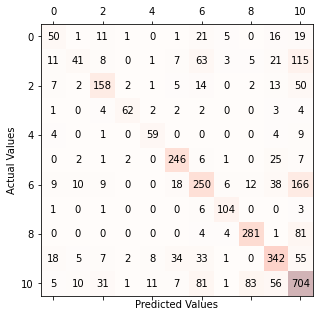

              precision    recall  f1-score   support

           0       0.47      0.40      0.43       125
           1       0.58      0.15      0.24       275
           2       0.68      0.62      0.65       254
           3       0.89      0.78      0.83        80
           4       0.72      0.77      0.74        77
           5       0.77      0.85      0.81       290
           6       0.52      0.48      0.50       518
           7       0.83      0.90      0.87       115
           8       0.73      0.76      0.75       371
           9       0.66      0.68      0.67       505
          10       0.58      0.71      0.64       990

    accuracy                           0.64      3600
   macro avg       0.68      0.64      0.65      3600
weighted avg       0.63      0.64      0.62      3600



In [ ]:
# Create Confusion metric:
cm = metrics.confusion_matrix(y_test, y_pred)
from IPython.display import Image, display

# Plot Confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

- Find ROC-AUC score:

In [ ]:
# Find ROC-AUC score for multiclass classification:
model_pipeline_cat_fin.fit(X_train, y_train)
y_score = model_pipeline_cat_fin.predict_proba(X_test)

# to use roc_auc for multiclass classification we need to use 'ovo' ('one vs one'), or obr ('one vs rest')
roc_auc_score(y_test, y_score, multi_class = 'ovo')

Learning rate set to 0.090655
0:	learn: 2.2604989	total: 82.1ms	remaining: 1m 22s
1:	learn: 2.1592762	total: 163ms	remaining: 1m 21s
2:	learn: 2.0818781	total: 248ms	remaining: 1m 22s
3:	learn: 2.0181809	total: 329ms	remaining: 1m 21s
4:	learn: 1.9676217	total: 409ms	remaining: 1m 21s
5:	learn: 1.9205192	total: 491ms	remaining: 1m 21s
6:	learn: 1.8760843	total: 571ms	remaining: 1m 20s
7:	learn: 1.8220080	total: 650ms	remaining: 1m 20s
8:	learn: 1.7709044	total: 720ms	remaining: 1m 19s
9:	learn: 1.7409161	total: 799ms	remaining: 1m 19s
10:	learn: 1.6993987	total: 872ms	remaining: 1m 18s
11:	learn: 1.6685930	total: 953ms	remaining: 1m 18s
12:	learn: 1.6420685	total: 1.04s	remaining: 1m 19s
13:	learn: 1.6171548	total: 1.12s	remaining: 1m 18s
14:	learn: 1.5878762	total: 1.2s	remaining: 1m 18s
15:	learn: 1.5704704	total: 1.28s	remaining: 1m 19s
16:	learn: 1.5539267	total: 1.37s	remaining: 1m 19s
17:	learn: 1.5393329	total: 1.46s	remaining: 1m 19s
18:	learn: 1.5238545	total: 1.54s	remaining:

0.9398542968281373

- ROC-AUC score: 0.9398542968281373

# Summary of Results:

- The best Classifier for this multiclass (11) Dataset is CatBoostClassifier (with default hyperparameters values).  
- Performance on Test set:   
Accuracy: 0.6380555555555556  
Precision: 0.634919792519906  
Recall: 0.6380555555555556  
F1 score: 0.6243703684214107  
- ROC-AUC score: 0.9398542968281373


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=204548b1-6558-4e0c-a0b7-558670c59b7a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>